In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sklearn
import statsmodels.api as sm
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-darkgrid")
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv("BigMac.csv")
data = data.set_index("City")

In [4]:
data

,BigMac,Bread,BusFare,EngSal,EngTax,Service,TeachSal,TeachTax,VacDays,WorkHrs
City,,,,,,,,,,
Amsterdam,31,9,1.27,44.3,44.1,280,21.8,28.2,31.9,1714
Athens,33,9,0.27,19.4,23.7,170,9.4,14.8,23.5,1792
Bogota,98,23,0.09,15.4,20.3,100,2.2,4.3,17.4,2152
Bombay,131,27,0.09,4.7,37.6,70,1.1,11.7,30.6,2052
Brussels,31,12,1.11,49.8,50.7,250,22.7,38.2,24.6,1708
Buenos Aires,105,26,0.24,15.0,18.5,210,2.3,17.0,16.2,1971
Caracas,103,75,0.20,5.3,6.1,250,2.5,6.5,21.1,2041
Chicago,18,18,1.13,56.5,33.1,260,33.3,27.5,11.8,1924
Copenhagen,39,4,2.46,54.3,44.8,330,29.1,39.5,25.0,1717


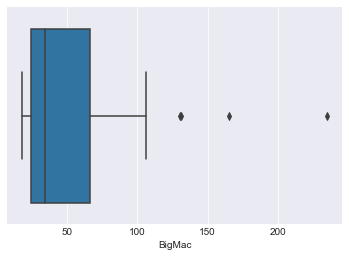

In [5]:
sns.boxplot(data.BigMac)

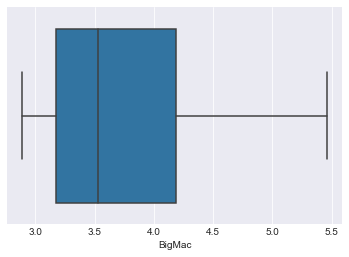

In [6]:
sns.boxplot(np.log(data.BigMac))

In [7]:
log_BigMac = np.log(data.BigMac)
data = data.drop("BigMac", axis=1)
data["log_BigMac"] = log_BigMac

In [8]:
data.head()

,Bread,BusFare,EngSal,EngTax,Service,TeachSal,TeachTax,VacDays,WorkHrs,log_BigMac
City,,,,,,,,,,
Amsterdam,9,1.27,44.3,44.1,280,21.8,28.2,31.9,1714,3.433987
Athens,9,0.27,19.4,23.7,170,9.4,14.8,23.5,1792,3.496508
Bogota,23,0.09,15.4,20.3,100,2.2,4.3,17.4,2152,4.584967
Bombay,27,0.09,4.7,37.6,70,1.1,11.7,30.6,2052,4.875197
Brussels,12,1.11,49.8,50.7,250,22.7,38.2,24.6,1708,3.433987


In [9]:
round(data.corr() ,2)

,Bread,BusFare,EngSal,EngTax,Service,TeachSal,TeachTax,VacDays,WorkHrs,log_BigMac
Bread,1.00,-0.26,-0.47,-0.32,-0.37,-0.43,-0.34,-0.02,0.17,0.57
BusFare,-0.26,1.00,0.61,0.64,0.73,0.69,0.79,0.24,-0.58,-0.54
EngSal,-0.47,0.61,1.00,0.59,0.62,0.91,0.56,0.09,-0.42,-0.78
EngTax,-0.32,0.64,0.59,1.00,0.44,0.48,0.85,0.32,-0.52,-0.36
Service,-0.37,0.73,0.62,0.44,1.00,0.69,0.64,0.22,-0.44,-0.53
TeachSal,-0.43,0.69,0.91,0.48,0.69,1.00,0.57,0.04,-0.37,-0.79
TeachTax,-0.34,0.79,0.56,0.85,0.64,0.57,1.00,0.23,-0.52,-0.42
VacDays,-0.02,0.24,0.09,0.32,0.22,0.04,0.23,1.00,-0.60,0.06
WorkHrs,0.17,-0.58,-0.42,-0.52,-0.44,-0.37,-0.52,-0.60,1.00,0.30
log_BigMac,0.57,-0.54,-0.78,-0.36,-0.53,-0.79,-0.42,0.06,0.30,1.00


C:\Users\hawi7\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


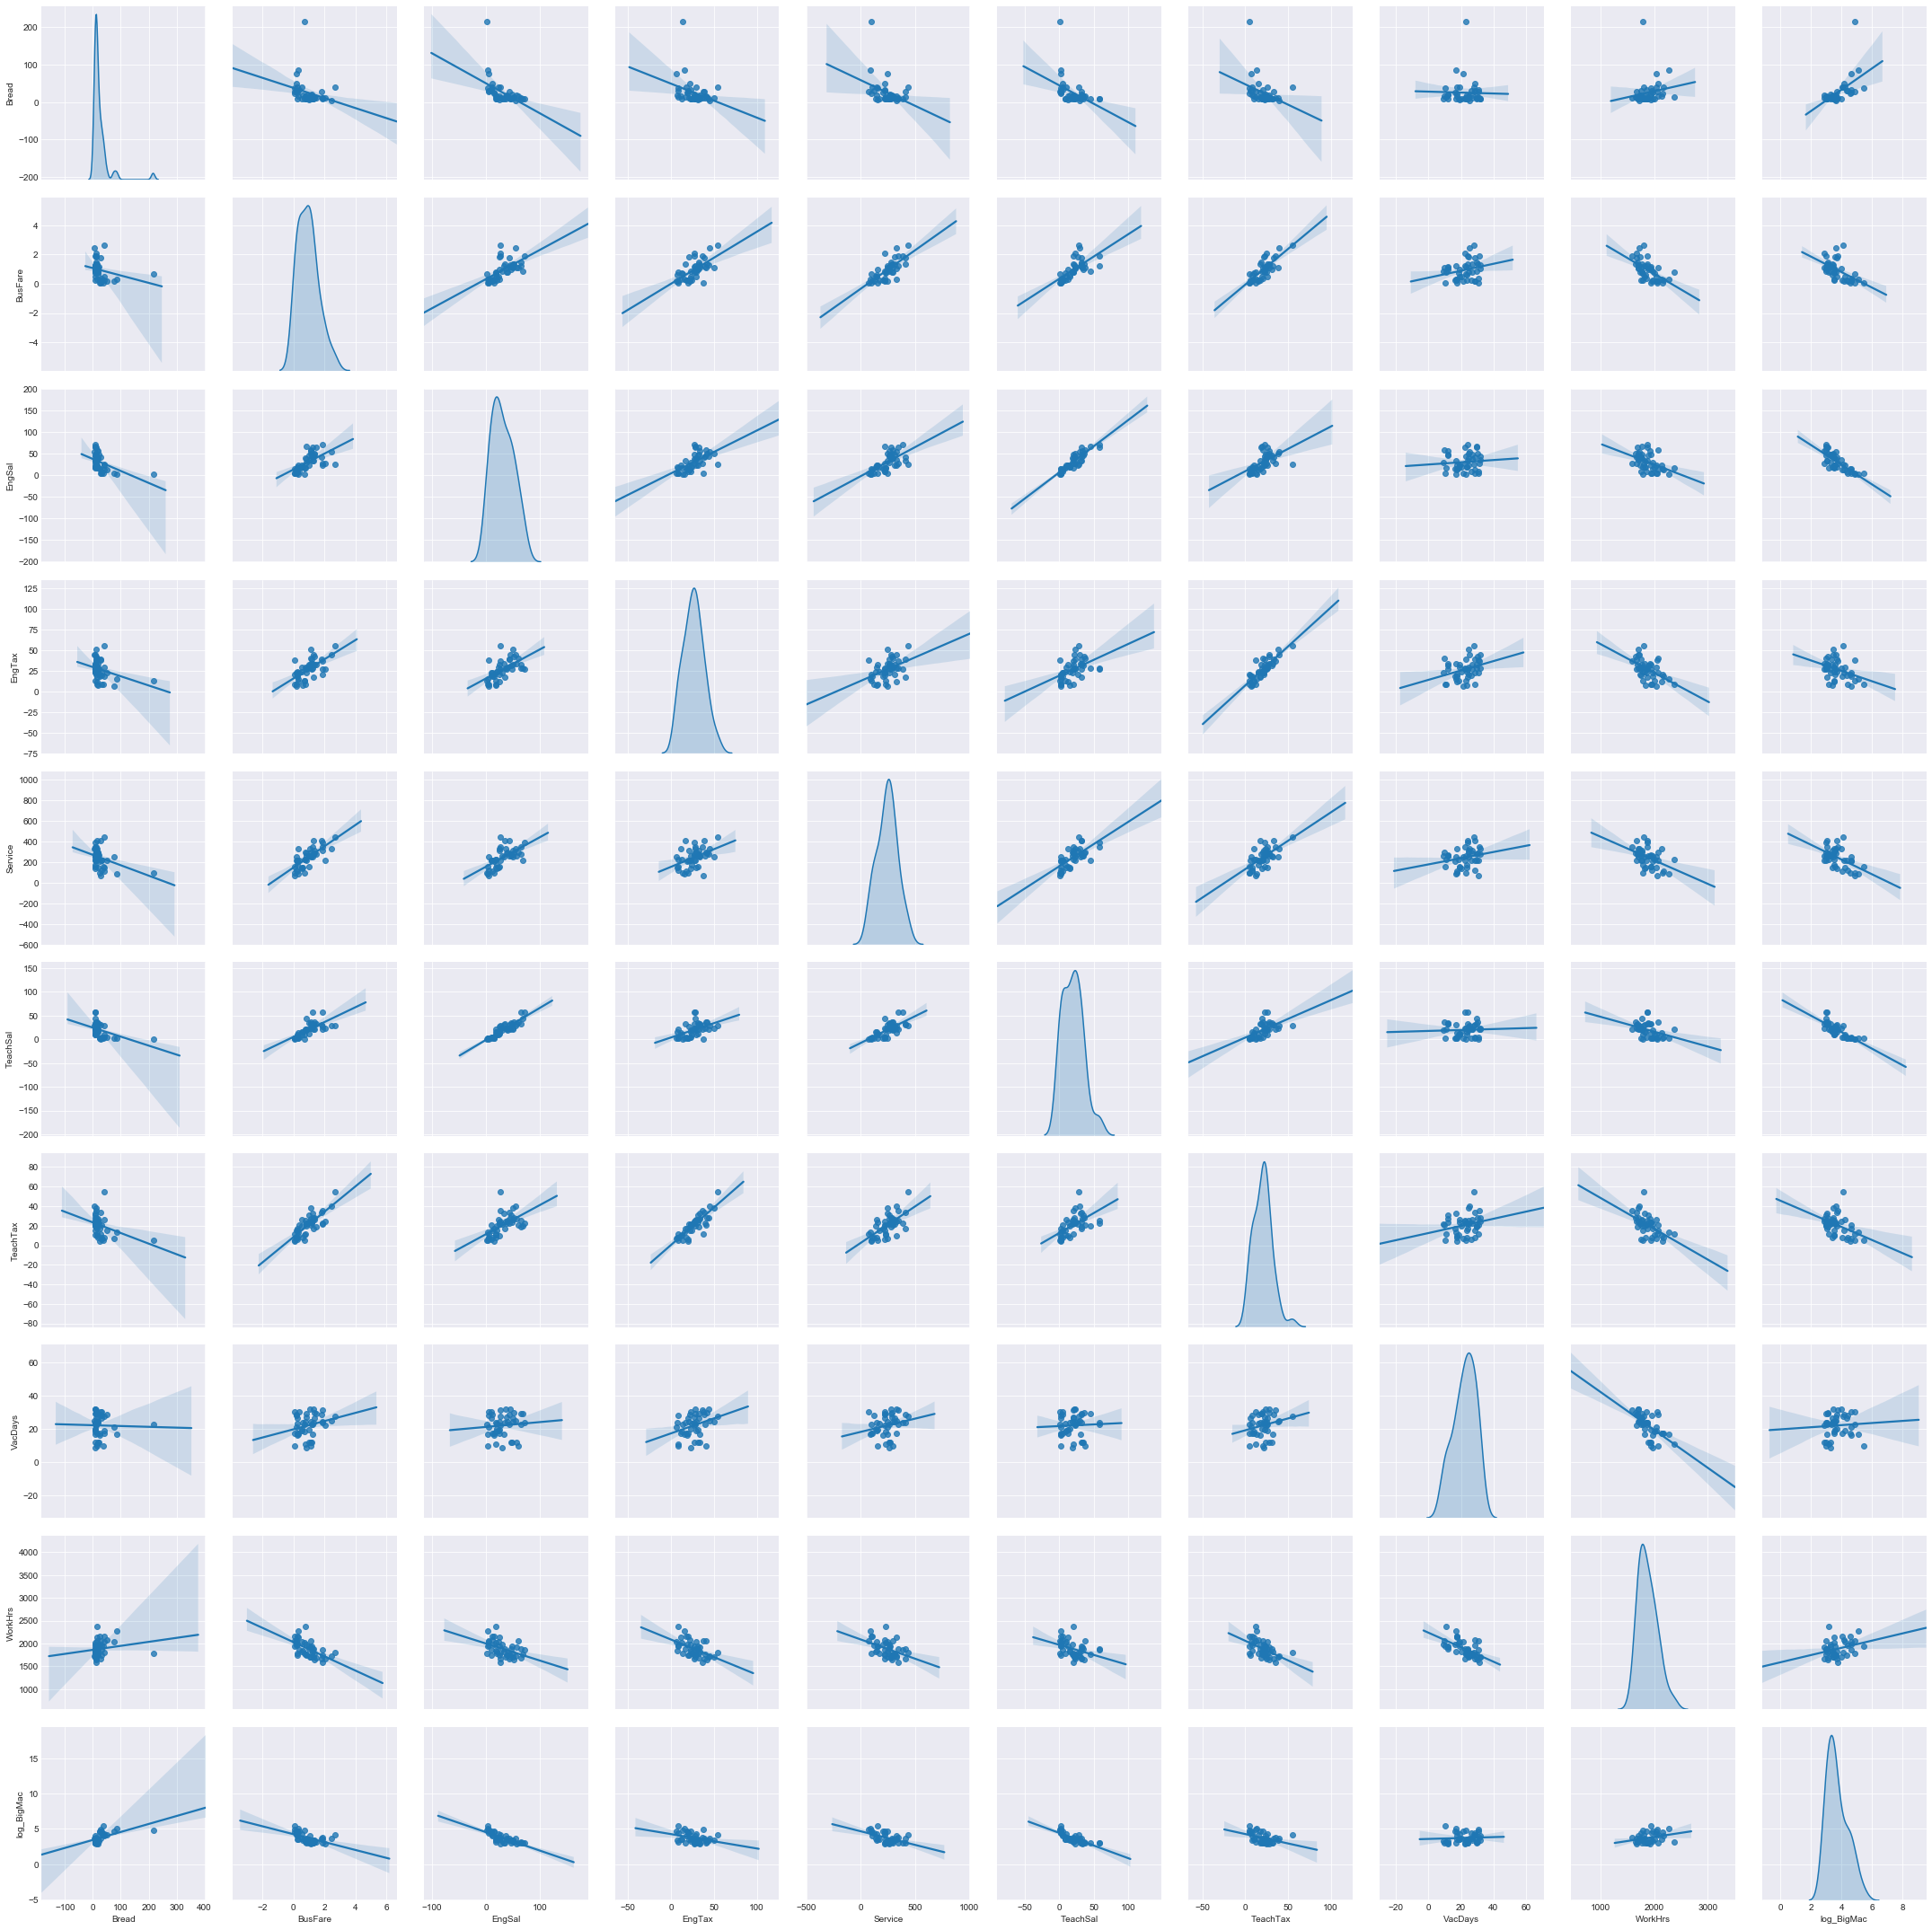

In [10]:
sns.pairplot(data,kind="reg", size=3, diag_kind="kde")

In [11]:
warnings.filterwarnings("ignore")
y = data["log_BigMac"]
X = data.drop("log_BigMac", axis=1)
X = sm.add_constant(X)

In [12]:
model1 = sm.OLS(y, X)
result = model1.fit()

In [13]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.666   
Dependent Variable: log_BigMac       AIC:                50.9124 
Date:               2019-05-07 03:27 BIC:                68.9791 
No. Observations:   45               Log-Likelihood:     -15.456 
Df Model:           9                F-statistic:        10.76   
Df Residuals:       35               Prob (F-statistic): 8.91e-08
R-squared:          0.734            Scale:              0.14963 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       3.0505     1.2454    2.4495   0.0195    0.5222   5.5788
Bread       0.0058     0.0020    2.8662   0.0070    0.0017   0.0100
BusFare    -0.2413     0.1933   -1.2482   0.2202   -0.6336   0.1511
EngSal     -0.0128     0.0090   -1.4181   0.1650   -0.0311   0.0055
EngTax      0.0097     0.0125    0.7769   0.4425   -0.0156   0.0350
Service     0.0009     0.0011    0.7547   0.4555   -0.0014   0.0031
TeachSal   -0.0148     0.0120   -1.2402   0.2232   -0.0391   0.0094
TeachTax    0.0034     0.0150    0.2234   0.8245   -0.0272   0.0339
VacDays     0.0136     0.0121    1.1269   0.2674   -0.0109   0.0382
WorkHrs     0.0003     0.0005    0.6137   0.5434   -0.0007   0.0014
-----------------------------------------------------------------
Omnibus:              17.578       Durbin-Watson:          1.680 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       24.156
Skew:                 1.242        Prob(JB):               0.000 
Kurtosis:             5.590        Condition No.:          41214 
=================================================================
* The condition number is large (4e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

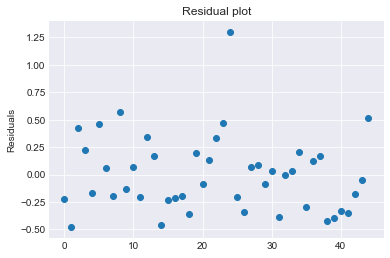

In [14]:
plt.scatter(y = result.resid , x = range(len(result.resid)))
plt.title("Residual plot")
plt.ylabel("Residuals")

### 데이터 구성
- BigMac : 빅맥 하나를 구매하기 위해 필요한 노동시간(분) (a.k.a 구매력지수)
- 생필품
    - Bread : 빵 1kg을 사기 위한 노동시간(분)
    - BusFare : 교통비용
    - Service : 19가지 서비스에 대한 연간비용
- 급여
    - EngSal : 전기기사의 연봉
    - TeachSal : 초등학교 교사의 연봉
- 세율 
    - EngTax : 전기기사의 세율
    - TeachTax : 초등학교 교사의 세율
- 노동력 관련 지수
    - WorkHrs : 연간 노동시간
    - VacDays : 연강 휴가 일 수    
    

In [15]:
# 생필품
life = ["Bread", "BusFare", "Service"]
# 급여
Sal = ["EngSal", "TeachSal"]
# 세율
Tax_rate = ["EngTax", "TeachTax"]
# 노동력
labor = ["WorkHrs","VacDays"]

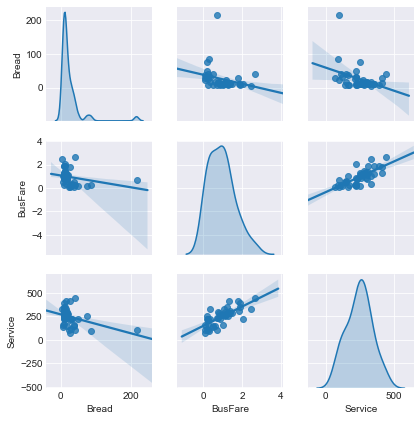

In [16]:
sns.pairplot(data[life],kind="reg", diag_kind= "kde", size=2)

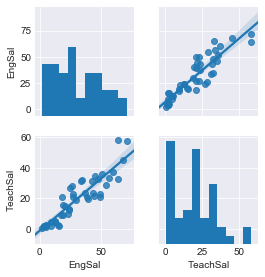

In [17]:
sns.pairplot(data[Sal],kind="reg", diag_kind= "hist", size=2)

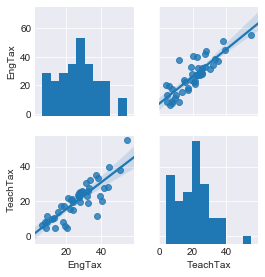

In [18]:
sns.pairplot(data[Tax_rate],kind="reg", diag_kind= "hist", size=2)

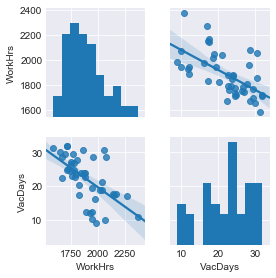

In [19]:
sns.pairplot(data[labor],kind="reg", diag_kind= "hist", size=2)

In [20]:
pc = sm.PCA(data[Sal], ncomp=1)
sal = pc.factors
pc = sm.PCA(data[Tax_rate], ncomp = 1)
Tax = pc.factors

In [21]:
WorkDays = data.WorkHrs/8
QoL = round(data.VacDays / WorkDays * 100 , 2)

In [22]:
y = data["log_BigMac"]
X = data.drop("log_BigMac", axis=1)

In [23]:
X = X.drop(Sal, axis = 1)
X = X.drop(Tax_rate, axis = 1)
X = X.drop("WorkHrs", axis = 1)
X["pca_Sal"] = sal
X["pca_Tax"] = Tax
X["WorkDays"] = WorkDays
warnings.filterwarnings("ignore")
X = sm.add_constant(X)

In [24]:
model1 = sm.OLS(y, X)
result = model1.fit()

In [25]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.684   
Dependent Variable: log_BigMac       AIC:                47.0072 
Date:               2019-05-07 03:27 BIC:                61.4605 
No. Observations:   45               Log-Likelihood:     -15.504 
Df Model:           7                F-statistic:        14.58   
Df Residuals:       37               Prob (F-statistic): 6.18e-09
R-squared:          0.734            Scale:              0.14184 
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       2.6711     1.1517    2.3193   0.0260    0.3376   5.0046
Bread       0.0059     0.0020    2.9803   0.0051    0.0019   0.0099
BusFare    -0.2490     0.1727   -1.4414   0.1579   -0.5989   0.1010
Service     0.0007     0.0010    0.7283   0.4710   -0.0013   0.0028
VacDays     0.0146     0.0113    1.2937   0.2038   -0.0083   0.0374
pca_Sal     2.9964     0.5930    5.0533   0.0000    1.7950   4.1979
pca_Tax    -0.9799     0.6010   -1.6305   0.1115   -2.1977   0.2378
WorkDays    0.0027     0.0040    0.6750   0.5039   -0.0054   0.0108
-----------------------------------------------------------------
Omnibus:              18.188       Durbin-Watson:          1.686 
Prob(Omnibus):        0.000        Jarque-Bera (JB):       25.842
Skew:                 1.263        Prob(JB):               0.000 
Kurtosis:             5.720        Condition No.:          7132  
=================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

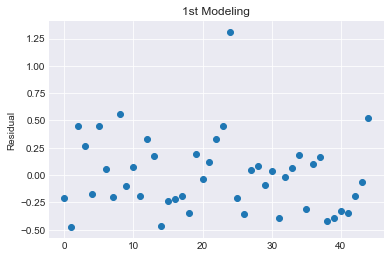

In [26]:
plt.scatter( range(len(result.resid)), result.resid)
plt.title("1st Modeling")
plt.ylabel("Residual")

In [27]:
data = data.drop("Mexico City")
y = data["log_BigMac"]
X = data.drop("log_BigMac", axis=1)

In [28]:
X = X.drop(Sal, axis = 1)
X = X.drop(Tax_rate, axis = 1)
X = X.drop("WorkHrs", axis = 1)
X["pca_Sal"] = sal
X["pca_Tax"] = Tax
X["WorkDays"] = WorkDays
warnings.filterwarnings("ignore")
X = sm.add_constant(X)

In [29]:
model1 = sm.OLS(y, X)
result = model1.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.784   
Dependent Variable: log_BigMac       AIC:                22.9288 
Date:               2019-05-07 03:27 BIC:                37.2024 
No. Observations:   44               Log-Likelihood:     -3.4644 
Df Model:           7                F-statistic:        23.25   
Df Residuals:       36               Prob (F-statistic): 1.43e-11
R-squared:          0.819            Scale:              0.083766
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.9574    0.9453   1.0128  0.3179  -0.9597   2.8744
Bread          0.0063    0.0015   4.1582  0.0002   0.0032   0.0094
BusFare       -0.1886    0.1333  -1.4155  0.1655  -0.4589   0.0816
Service        0.0004    0.0008   0.4800  0.6341  -0.0012   0.0020
VacDays        0.0333    0.0094   3.5444  0.0011   0.0142   0.0523
pca_Sal        2.5420    0.4641   5.4770  0.0000   1.6007   3.4832
pca_Tax       -1.2747    0.4654  -2.7390  0.0095  -2.2185  -0.3309
WorkDays       0.0081    0.0033   2.5049  0.0169   0.0015   0.0147
-----------------------------------------------------------------
Omnibus:              1.328        Durbin-Watson:           1.878
Prob(Omnibus):        0.515        Jarque-Bera (JB):        1.279
Skew:                 0.382        Prob(JB):                0.527
Kurtosis:             2.663        Condition No.:           7577 
=================================================================
* The condition number is large (8e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

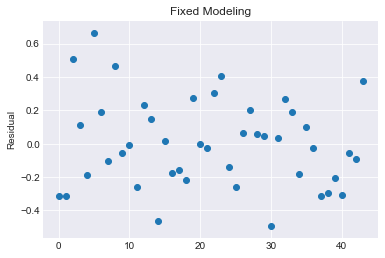

In [30]:
plt.scatter( range(len(result.resid)), result.resid)
plt.title("Fixed Modeling")
plt.ylabel("Residual")

,Bread,BusFare,Service
Bread,1.00,-0.26,-0.37
BusFare,-0.26,1.00,0.73
Service,-0.37,0.73,1.00


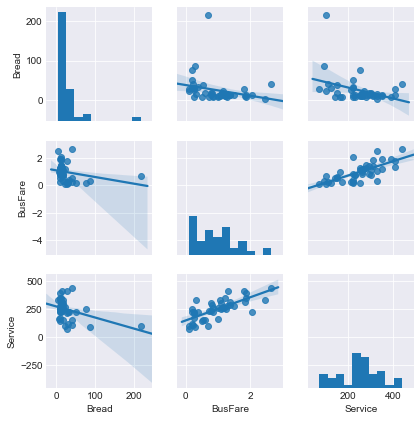

In [31]:
life = ["Bread", "BusFare", "Service"]
sns.pairplot(data[life],kind="reg", diag_kind= "hist", size=2)
round( data[life].corr(), 2)

In [32]:
life = ["BusFare", "Service"]
pc = sm.PCA(data[life], ncomp = 1)
Life = pc.factors
X = X.drop(life, axis = 1)
X["pca_Life"] = Life

In [33]:
model1 = sm.OLS(y, X)
result = model1.fit()

In [34]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.782   
Dependent Variable: log_BigMac       AIC:                22.5282 
Date:               2019-05-07 03:27 BIC:                35.0175 
No. Observations:   44               Log-Likelihood:     -4.2641 
Df Model:           6                F-statistic:        26.67   
Df Residuals:       37               Prob (F-statistic): 4.95e-12
R-squared:          0.812            Scale:              0.084519
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.6293    0.8971   0.7015  0.4874  -1.1883   2.4469
Bread          0.0059    0.0015   3.9874  0.0003   0.0029   0.0090
VacDays        0.0353    0.0093   3.8163  0.0005   0.0166   0.0541
pca_Sal        2.5057    0.4651   5.3872  0.0000   1.5633   3.4482
pca_Tax       -1.0903    0.4391  -2.4832  0.0177  -1.9800  -0.2007
WorkDays       0.0090    0.0032   2.8332  0.0074   0.0026   0.0154
pca_Life       0.4130    0.4901   0.8427  0.4048  -0.5800   1.4060
-----------------------------------------------------------------
Omnibus:              1.001        Durbin-Watson:           1.828
Prob(Omnibus):        0.606        Jarque-Bera (JB):        0.866
Skew:                 0.331        Prob(JB):                0.649
Kurtosis:             2.812        Condition No.:           4961 
=================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [35]:
X.corr()

,const,Bread,VacDays,pca_Sal,pca_Tax,WorkDays,pca_Life
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bread,NaN,1.000000,-0.010337,0.462959,0.341828,0.166148,0.335447
VacDays,NaN,-0.010337,1.000000,-0.011824,-0.234175,-0.614742,-0.208228
pca_Sal,NaN,0.462959,-0.011824,1.000000,0.564167,0.405724,0.707274
pca_Tax,NaN,0.341828,-0.234175,0.564167,1.000000,0.543726,0.690077
WorkDays,NaN,0.166148,-0.614742,0.405724,0.543726,1.000000,0.547598
pca_Life,NaN,0.335447,-0.208228,0.707274,0.690077,0.547598,1.000000


In [36]:
X = X.drop("pca_Life", axis = 1)

In [37]:
model1 = sm.OLS(y, X)
result = model1.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.783   
Dependent Variable: log_BigMac       AIC:                21.3646 
Date:               2019-05-07 03:27 BIC:                32.0697 
No. Observations:   44               Log-Likelihood:     -4.6823 
Df Model:           5                F-statistic:        32.10   
Df Residuals:       38               Prob (F-statistic): 1.16e-12
R-squared:          0.809            Scale:              0.083874
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.5244    0.8850   0.5926  0.5570  -1.2671   2.3160
Bread          0.0059    0.0015   3.9786  0.0003   0.0029   0.0089
VacDays        0.0351    0.0092   3.8114  0.0005   0.0165   0.0538
pca_Sal        2.6971    0.4044   6.6701  0.0000   1.8785   3.5157
pca_Tax       -0.9432    0.4013  -2.3502  0.0241  -1.7556  -0.1308
WorkDays       0.0095    0.0031   3.0427  0.0042   0.0032   0.0158
-----------------------------------------------------------------
Omnibus:              0.609        Durbin-Watson:           1.692
Prob(Omnibus):        0.737        Jarque-Bera (JB):        0.392
Skew:                 0.230        Prob(JB):                0.822
Kurtosis:             2.945        Condition No.:           4943 
=================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

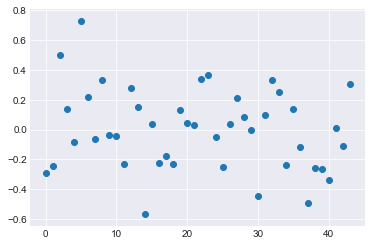

In [38]:
plt.scatter( range(len(result.resid)), result.resid)

In [39]:
data = pd.read_csv("BigMac.csv")
data = data.set_index("City")

In [42]:
data.loc["Mexico City", :]

BigMac       235.00
Bread         37.00
BusFare        0.09
EngSal         3.80
EngTax         8.40
Service      160.00
TeachSal       2.10
TeachTax       4.70
VacDays       10.10
WorkHrs     1944.00
Name: Mexico City, dtype: float64

In [54]:
data.EngSal

City
Amsterdam         44.3
Athens            19.4
Bogota            15.4
Bombay             4.7
Brussels          49.8
Buenos Aires      15.0
Caracas            5.3
Chicago           56.5
Copenhagen        54.3
Dublin            43.4
Dusseldorf        64.6
Frankfort         51.5
Geneva            64.3
Helsinki          42.6
Hong Kong         18.3
Houston           29.5
Johannesburg      24.2
Kuala Lumpur      12.1
Lagos              1.9
London            24.4
Los Angeles       60.0
Luxembourg        68.3
Madrid            36.9
Manila             3.5
Mexico City        3.8
Milan             39.9
Montreal          33.6
Nairobi            4.3
New York          48.0
Nicosia           20.3
Oslo              26.9
Panama            12.1
Paris             38.8
Rio de Janeiro     9.5
Sao Paulo          9.2
Seoul             18.8
Singapore         23.4
Stockholm         26.3
Sydney            27.2
Taipei            24.2
Tel Aviv          17.6
Tokyo             34.9
Toronto           45.5
Vienna

In [55]:
data.BigMac

City
Amsterdam          31
Athens             33
Bogota             98
Bombay            131
Brussels           31
Buenos Aires      105
Caracas           103
Chicago            18
Copenhagen         39
Dublin             29
Dusseldorf         22
Frankfort          22
Geneva             21
Helsinki           40
Hong Kong          24
Houston            27
Johannesburg       35
Kuala Lumpur       57
Lagos             130
London             36
Los Angeles        20
Luxembourg         20
Madrid             54
Manila            165
Mexico City       235
Milan              33
Montreal           21
Nairobi            82
New York           26
Nicosia            40
Oslo               43
Panama             66
Paris              39
Rio de Janeiro     79
Sao Paulo         106
Seoul              30
Singapore          70
Stockholm          61
Sydney             18
Taipei             34
Tel Aviv           33
Tokyo              21
Toronto            20
Vienna             30
Zurich             20
Name:

In [47]:
pc = sm.PCA(data[Sal], ncomp=1)
sal = pc.factors
pc = sm.PCA(data[Tax_rate], ncomp = 1)
Tax = pc.factors

In [48]:
sal

,comp_0
City,
Amsterdam,-0.061751
Athens,0.100546
Bogota,0.153882
Bombay,0.201488
Brussels,-0.087973
Buenos Aires,0.154922
Caracas,0.191812
Chicago,-0.169667
Copenhagen,-0.139076


In [49]:
Tax

,comp_0
City,
Amsterdam,-0.172503
Athens,0.062200
Bogota,0.162337
Bombay,-0.007443
Brussels,-0.290250
Buenos Aires,0.080575
Caracas,0.240621
Chicago,-0.094114
Copenhagen,-0.260572
